# Progress Report: Analysis On Factors Leading to Obesity in America
## Project Introduction/Changes
With obesity at all time rates in the United States it is important to understand the individuals most at risk. This analysis is focused on the critical issue of obesity among individuals in America, exploring data from selected population characteristics. This information was made available by the Centers of Disease Control and Prevention (CDC). Our goals are to investigate if race plays a role in being at risk of obesity, if income is the leading factor in obesity, and to explore other interesting relationships found within the data. We have not made any changes to our scope since the project proposal.

**Github Repository**: https://github.com/uic-cs418/group-project-mind-masters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from obesity_children import * #cleaning python file
import data1_helper # for analyzing data 1

## Reading Data / Cleaning Data
**Data - Obesity Among Children and Adolescents 2-19**

In [82]:
obesity_children = pd.read_csv("Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_States.csv")
obesity_single_unique = remove_single_unique(obesity_children)
obesity_clean = remove_num_columns(obesity_single_unique)
sex_race_his_obesity, race_his_obesity, total_obesity, poverty_obesity, sex_obesity, age_obesity = final_clean(obesity_clean)
poverty_obesity.head()

,PANEL,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE,SE,FLAG
171,2-19 years,Percent of poverty level,Below 100%,1988-1994,2-19 years,12.6,1.2,NaN
172,2-19 years,Percent of poverty level,Below 100%,1999-2002,2-19 years,17.6,1.1,NaN
173,2-19 years,Percent of poverty level,Below 100%,2001-2004,2-19 years,17.9,1.3,NaN
174,2-19 years,Percent of poverty level,Below 100%,2003-2006,2-19 years,18.9,1.4,NaN
175,2-19 years,Percent of poverty level,Below 100%,2005-2008,2-19 years,19.9,1.4,NaN


**Data - Obesity Among Adults 20+**

In [81]:
obesity_adult = pd.read_csv("Normal_weight__overweight__and_obesity_among_adults_aged_20_and_over__by_selected_characteristics__United_States.csv")
panelDict, unitDict, stubNameDict, stubLabelDict, yearDict, ageDict = data1_helper.getMapping(obesity_adult)
raceGender_df = data1_helper.cleanGenderRace(obesity_adult)
age_df = data1_helper.cleanAge(obesity_adult)
raceGender_df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG,Gender,Race
49,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: White only,3.111,2015-2018,10,20 years and over,1.0,23.4,1.4,.,Male,White
59,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Female: Not Hispanic or Latino: White only,3.112,2015-2018,10,20 years and over,1.0,31.9,1.7,.,Female,White
79,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: Black or African...,3.121,2015-2018,10,20 years and over,1.0,26.4,1.7,.,Male,Black or African American
89,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Female: Not Hispanic or Latino: Black or Afric...,3.122,2015-2018,10,20 years and over,1.0,19.2,1.2,.,Female,Black or African American
109,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: Asian only,3.131,2015-2018,10,20 years and over,1.0,41.9,1.7,.,Male,Asian


## Exploratory Data Analysis (EDA)

**Data - Obesity Among Children and Adolescents 2-19, Obesity Among Adults 20+**
+ Structure: The columns consists of objects such as age range, poverty level, year range, flag and quantitative data such as estimate, standard error. The flag tells us if the data is normal, unrelaible(standard error over 20%), and no data.
+ Granularity: Each row provides an obesity percentage estimation given the parameters from a sample.
+ Scope: Obesity percentage of individuals 2-19 in America from 1988-2018.
+ Temporality: The data spans from 1988 to 2018. However there is more data of recent years.
+ Faithfulness (All dataset): The data is trustworthy as it comes from the CDC which is a reputable source and collects data from healthcare areas.

## Visualizations

**Visual 1 - Data - Obesity Among Children and Adolescents 2-19**

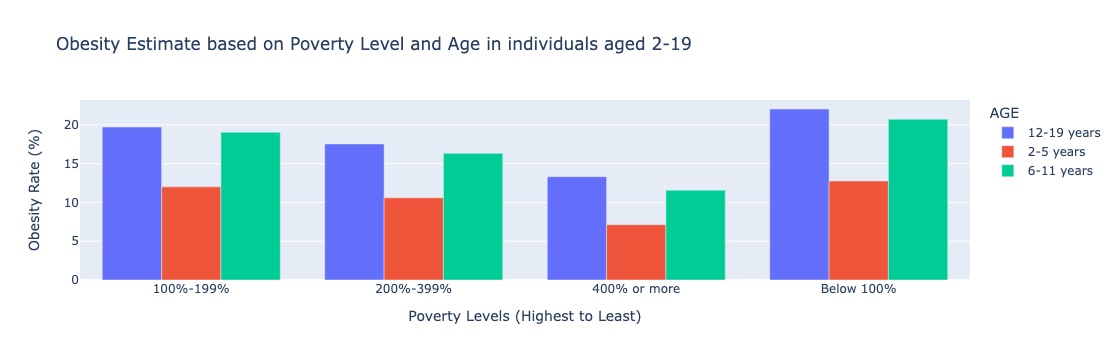

In [83]:
obesity_Visual1(poverty_obesity)

One of our hypothesis before analyzing the data was that income was the leading contributing factor of obesity. To test this in individuals 2-19, we looked at the poverty levels to examine the correlation between income and obesity rates across different age groups. The visualization shows that people who have higher poverty levels will have a higher obesity rate, and it shows that obesity levels decrease as poverty levels decrease. The graph clearly illustrates that regardless of poverty level, the age group of 12-19 consistently exhibits the highest obesity rates. This suggests that factors beyond income may play a significant role in determining obesity prevalence among adolescents. Additionally, the data reveals that individuals aged 2-5, particularly those at a poverty percentage of 400% or more, are the least at risk of obesity.

**Visual 2 - Data - Obesity Among Adults 20+**

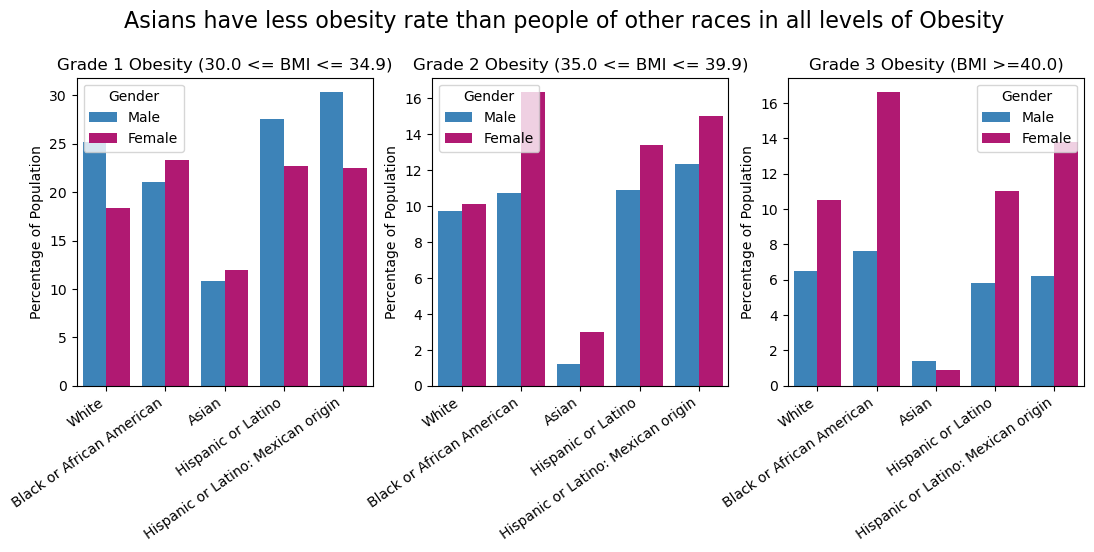

In [5]:
data1_helper.obesityRaceVsObesity(raceGender_df)

We created this visualization to test the hypothesis that Asians have a lower obesity rate than other races, the visualization shows that Asians have a lower obesity level than other races in all 3 different types of obesity:

+ Obesity grade 1: 10% asians have grade 1 obesity and other races average is around 20%;

+ Obesity grade 2: 4% of Asians have grade 2 obesity and other races average is around 10%;

+ Obesity grade 3: 1% of Asians have grade 3 obesity and other races average is around 9%

## Machine Learning Analysis

**Question**: Based on the trend of the rate of obesity of adult in the US between 1988 and 2018, what will be the rate of obesity in the US in 2024?

To answer this question we write a linear regression model that fits the data about the rate of obesity of adult, then based on this data we predict the rate of obesity in the close futue


In [6]:
from scipy import stats
import sklearn.metrics as sm

# prepare data for ML
middleYearDict = data1_helper.getMiddleYear(yearDict)  
generalObesity = data1_helper.getFilteredData(obesity_adult, 1, 3, 1, 1.1, middleYearDict)
x = generalObesity["MiddleYear"]
y = generalObesity["ESTIMATE"]

In [7]:
# baseline ML model: mean
baselineML = data1_helper.MeanModel()
data1_helper.fitAndEvaluate(baselineML, x, y)

mean squared error:  22.442400000000003


In [8]:
# linear regression model
linRegressML = data1_helper.LinearRegressionModel()
data1_helper.fitAndEvaluate(linRegressML, x, y)

mean squared error:  0.5901431713657087


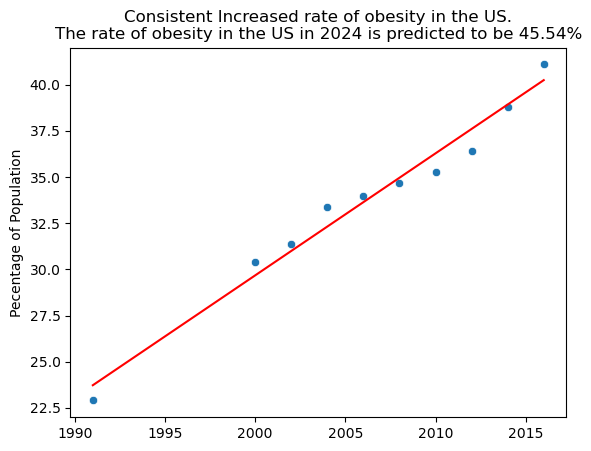

In [9]:
data1_helper.plotML(generalObesity, linRegressML, x) # plot data and best fit line

**Comment**: The linear regression outperforms the baseline model with mean squared error = 1. The model predicts that in 2024, 45.54% of the population in US are obese. The result is reasonable in the fact that the rate of obesity always increases according to our data and 2024 is close to this year range 1988-2018 so it is safe to predict based on this trend.

## Reflections 
**What has been the hardest part of the project encountered so far?** 
+ The hardest part was understanding the raw data and propertly cleaning the data. Many of the column names were differently then expected and knowing how each column correlated with the other columns took a while to understand. Not only that but knowing the different values that can occur in every column and if it was neccesary for the analysis. Only after understanding this can we propertly clean the data and subset the data.
  
**What are your intial insights?**
+ Some of out initial insights are higher poverty levels correlate to higher obesity percentage amongst individuals 2-19. From each obesity level the individuals most at risk lie between the ages of 12-19 while the individuals from 2-5 bear the least risk. For individuals 20+, the gender most at risk of grade 3 obesity are women in all races except asian. As the obesity severity decreases, males become at risk. White and asian race are more likely to develop grade 1 obesity but beyond that hispanic or latinos and black or african americans at risk of developing grade 3 obesity. 

**Are there any concrete results you can show at this point? If not, why not?**
+ 
  
**Going forward, what are the current biggest problems you’re facing?**
+ We have chosen three datasets to analyze for this project and we have successfully managed to analyze two of them. However, the third dataset is quite large so it has been much more difficult to analyze as there is much to analyze.
  
**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**
+ To date, we are up to track on the project and have cleaned all the data, performed EDA, created multiple visualizations, and perfromed two ML analysis. We could work on perfecting the machine learning and coming up with more unique visualizations that can help convey the results.
  
**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?**
+ Proceeding with this project is worth it as our project can understand those at most risk and the factors that lead them to be at risk. Our projects analysis can be relevant to clients such as the city, state, country, healthcare professionals, and more.
## Next Steps
**What do you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.**
+ We plan to accomplish finishing our interactive map visualization, correlation analysis, and analyze the third dataset to a greater extent. To evaluate whether our project achieved the goals 
